## G2M insight for cab investment firm

### 1-Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from scipy import stats

In [2]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

##2-Reading the datasets

In [3]:
#Cab_Data
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000
1,10000012,42375,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000
2,10000013,42371,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000
3,10000014,42376,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000
4,10000015,42372,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000


In [4]:
cab_data.shape

(359392, 7)

In [5]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
a = cab_data['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]





In [7]:
cab_data['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [8]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [9]:
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})

In [10]:
#if median value < mean value and there are large differences in value between the 75th % and max value; this implies there are outliers in our dataset 
cab_data.describe()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,10220761.185363,22.567254,423.443311,286.190113
std,126805.803715,12.233526,274.378911,157.993661
min,10000011.000000,1.900000,15.600000,19.000000
25%,10110809.750000,12.000000,206.437500,151.200000
50%,10221035.500000,22.440000,386.360000,282.480000
75%,10330937.250000,32.960000,583.660000,413.683200
max,10440107.000000,48.000000,2048.030000,691.200000


In [11]:
#TransactionID
transaction_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
transaction_id.shape

(440098, 3)

In [13]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [14]:
for col in transaction_id.columns:
    if ' ' in col:
        transaction_id = transaction_id.rename(columns={col:col.replace(' ','_')})

In [15]:
#Customer data
customer_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
customer_id.head()



,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
customer_id.shape

(49171, 4)

In [17]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
for col in customer_id.columns:
    if ' ' in col:
        customer_id = customer_id.rename(columns={col:col.replace(' ','_')})

In [19]:
customer_id = customer_id.rename(columns={'Income_(USD/Month)':'Income'})

In [20]:
customer_id.describe()

,Customer_ID,Age,Income
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [21]:
city_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [22]:
city_data.shape

(20, 3)

In [23]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [24]:
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)

In [25]:
city_data['Percentage_Users'] = (city_data['Users'] / city_data['Population']) * 100

In [26]:
city_data

,City,Population,Users,Percentage_Users
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


### Combine the Datasets

In [27]:
cab = cab_data.set_index(['Transaction_ID'])
transaction = transaction_id.set_index(['Transaction_ID'])
dataset = cab.join(transaction)
dataset

,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,
10000011,2016-01-07,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,29290,Card
10000012,2016-01-05,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,27703,Card
10000013,2016-01-01,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,28712,Cash
10000014,2016-01-06,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,28020,Cash
10000015,2016-01-02,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,27182,Card
...,...,...,...,...,...,...,...,...
10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.800000,69.240000,63.360000,52392,Cash
10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,53286,Cash
10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,52265,Cash


In [28]:
dataset.reset_index(level =['Transaction_ID'], inplace = True)
dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,29290,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,27703,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,28712,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,28020,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.800000,69.240000,63.360000,52392,Cash
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,53286,Cash
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,52265,Cash
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.800000,146.190000,114.048000,52175,Card


In [29]:
combined = dataset.set_index([dataset.index,'Customer_ID'])
customer = customer_id.set_index(['Customer_ID'])
dataset = combined.join(customer)
dataset

,,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income
,Customer_ID,,,,,,,,,,,
0,29290,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,Card,Male,28,10813
1,27703,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,Card,Male,27,9237
2,28712,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,Cash,Male,53,11242
3,28020,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,Cash,Male,23,23327
4,27182,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.800000,69.240000,63.360000,Cash,Male,24,15651
359388,53286,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,Cash,Male,32,6528
359389,52265,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,Cash,Male,56,7966


In [30]:
dataset.reset_index(level =['Customer_ID'], inplace = True)
dataset

,Customer_ID,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income
0,29290,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,Card,Male,28,10813
1,27703,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,Card,Male,27,9237
2,28712,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,Cash,Male,53,11242
3,28020,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,Cash,Male,23,23327
4,27182,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.800000,69.240000,63.360000,Cash,Male,24,15651
359388,53286,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,Cash,Male,32,6528
359389,52265,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,Cash,Male,56,7966
359390,52175,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.800000,146.190000,114.048000,Card,Male,32,6423


In [31]:
dataset = pd.merge(dataset, city_data, on = 'City', how = 'inner')

In [32]:
dataset['Profit'] = dataset['Price_Charged'] - dataset['Cost_of_Trip']
dataset = dataset[['Transaction_ID', 'Customer_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Profit', 'Payment_Mode', 'Gender', 'Age', 'Income','Population','Users','Percentage_Users']]
dataset

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Payment_Mode,Gender,Age,Income,Population,Users,Percentage_Users
0,10000011,29290,2016-01-07,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,57.315000,Card,Male,28,10813,814885,24701,3.031225
1,10000012,27703,2016-01-05,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,23.666000,Card,Male,27,9237,814885,24701,3.031225
2,10000013,28712,2016-01-01,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,27.568000,Cash,Male,53,11242,814885,24701,3.031225
3,10000014,28020,2016-01-06,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,25.798000,Cash,Male,23,23327,814885,24701,3.031225
4,10000015,27182,2016-01-02,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,16.844000,Card,Male,33,8536,814885,24701,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,2018-01-07,Yellow Cab,WASHINGTON DC,4.800000,69.240000,63.360000,5.880000,Cash,Male,24,15651,418859,127001,30.320705
359388,10440104,53286,2018-01-03,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,6.902000,Cash,Male,32,6528,418859,127001,30.320705
359389,10440105,52265,2018-01-04,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,87.420000,Cash,Male,56,7966,418859,127001,30.320705
359390,10440106,52175,2018-01-04,Yellow Cab,WASHINGTON DC,8.800000,146.190000,114.048000,32.142000,Card,Male,32,6423,418859,127001,30.320705


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    359392 non-null  int64         
 1   Customer_ID       359392 non-null  int64         
 2   Date_of_Travel    359392 non-null  datetime64[ns]
 3   Company           359392 non-null  object        
 4   City              359392 non-null  object        
 5   KM_Travelled      359392 non-null  float64       
 6   Price_Charged     359392 non-null  float64       
 7   Cost_of_Trip      359392 non-null  float64       
 8   Profit            359392 non-null  float64       
 9   Payment_Mode      359392 non-null  object        
 10  Gender            359392 non-null  object        
 11  Age               359392 non-null  int64         
 12  Income            359392 non-null  int64         
 13  Population        359392 non-null  int64         
 14  User

In [34]:
dataset.describe()

,Transaction_ID,Customer_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Age,Income,Population,Users,Percentage_Users
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,10220761.185363,19191.652115,22.567254,423.443311,286.190113,137.253198,35.336705,15048.822937,3132198.044127,158365.582267,10.668662
std,126805.803715,21012.412463,12.233526,274.378911,157.993661,160.311840,12.594234,7969.409482,3315194.391537,100850.051020,10.633114
min,10000011.000000,1.000000,1.900000,15.600000,19.000000,-220.060000,18.000000,2000.000000,248968.000000,3643.000000,0.649683
25%,10110809.750000,2705.000000,12.000000,206.437500,151.200000,28.012000,25.000000,8424.000000,671238.000000,80021.000000,3.594514
50%,10221035.500000,7459.000000,22.440000,386.360000,282.480000,81.962000,33.000000,14685.000000,1595037.000000,144132.000000,7.296413
75%,10330937.250000,36078.000000,32.960000,583.660000,413.683200,190.030000,42.000000,21035.000000,8405837.000000,302149.000000,9.036279
max,10440107.000000,60000.000000,48.000000,2048.030000,691.200000,1463.966000,65.000000,35000.000000,8405837.000000,302149.000000,32.141078


### EDA

In [35]:
dataset.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Payment_Mode,Gender,Age,Income,Population,Users,Percentage_Users
count,359392.000000,359392.000000,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
unique,NaN,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10220761.185363,19191.652115,NaN,NaN,NaN,22.567254,423.443311,286.190113,137.253198,NaN,NaN,35.336705,15048.822937,3132198.044127,158365.582267,10.668662
std,126805.803715,21012.412463,NaN,NaN,NaN,12.233526,274.378911,157.993661,160.311840,NaN,NaN,12.594234,7969.409482,3315194.391537,100850.051020,10.633114
min,10000011.000000,1.000000,NaN,NaN,NaN,1.900000,15.600000,19.000000,-220.060000,NaN,NaN,18.000000,2000.000000,248968.000000,3643.000000,0.649683
25%,10110809.750000,2705.000000,NaN,NaN,NaN,12.000000,206.437500,151.200000,28.012000,NaN,NaN,25.000000,8424.000000,671238.000000,80021.000000,3.594514


#### Missing values

In [36]:
dataset.isnull().sum() 

Transaction_ID      0
Customer_ID         0
Date_of_Travel      0
Company             0
City                0
KM_Travelled        0
Price_Charged       0
Cost_of_Trip        0
Profit              0
Payment_Mode        0
Gender              0
Age                 0
Income              0
Population          0
Users               0
Percentage_Users    0
dtype: int64

#### checking duplicate values

In [37]:
duplicated_rows = dataset[dataset.duplicated()]
print('Total number of duplicated rows is', duplicated_rows.shape[0])

Total number of duplicated rows is 0


#### Outliers

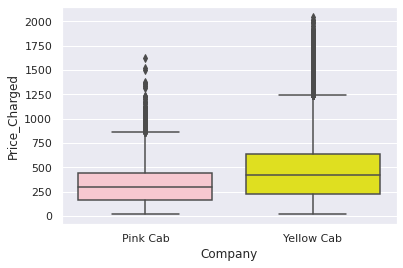

In [38]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# Specifying a color for each distribution
my_pal = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x="Company", 
                 y="Price_Charged", 
                 data=dataset,
                 order=["Pink Cab", "Yellow Cab"], 
                 palette= my_pal)

#### Note :
* Outliers are present in the Price Charged feature
* Outliers are present in the Price Charged feature

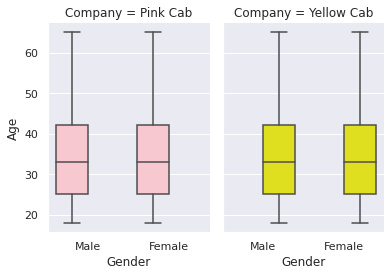

In [39]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# Specifying a color for each distribution
my_pal = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

ax = sns.catplot(x="Gender", 
            y="Age",
            hue="Company", 
            col="Company",
            data=dataset, 
            kind="box",
            height=4, 
            aspect=.7, palette= my_pal)

### Correlations

In [40]:
dataset.corr()

,Transaction_ID,Customer_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Age,Income,Population,Users,Percentage_Users
Transaction_ID,1.000000,-0.016912,-0.001429,-0.052902,-0.003462,-0.087130,-0.001267,-0.001570,0.023868,0.013526,-0.022612
Customer_ID,-0.016912,1.000000,0.000389,-0.177324,0.003077,-0.306527,-0.004735,-0.013608,-0.647052,-0.610742,0.805490
KM_Travelled,-0.001429,0.000389,1.000000,0.835753,0.981848,0.462768,-0.000369,-0.000544,-0.002311,-0.000428,0.002305
Price_Charged,-0.052902,-0.177324,0.835753,1.000000,0.859812,0.864154,-0.003084,0.003228,0.326589,0.281061,-0.150070
Cost_of_Trip,-0.003462,0.003077,0.981848,0.859812,1.000000,0.486056,-0.000189,-0.000633,0.015108,0.023628,0.018128
Profit,-0.087130,-0.306527,0.462768,0.864154,0.486056,1.000000,-0.005093,0.006148,0.544079,0.457758,-0.274715
Age,-0.001267,-0.004735,-0.000369,-0.003084,-0.000189,-0.005093,1.000000,0.003907,-0.009002,-0.005906,-0.001778
Income,-0.001570,-0.013608,-0.000544,0.003228,-0.000633,0.006148,0.003907,1.000000,0.011868,0.010464,-0.009332
Population,0.023868,-0.647052,-0.002311,0.326589,0.015108,0.544079,-0.009002,0.011868,1.000000,0.915490,-0.498707
Users,0.013526,-0.610742,-0.000428,0.281061,0.023628,0.457758,-0.005906,0.010464,0.915490,1.000000,-0.258919


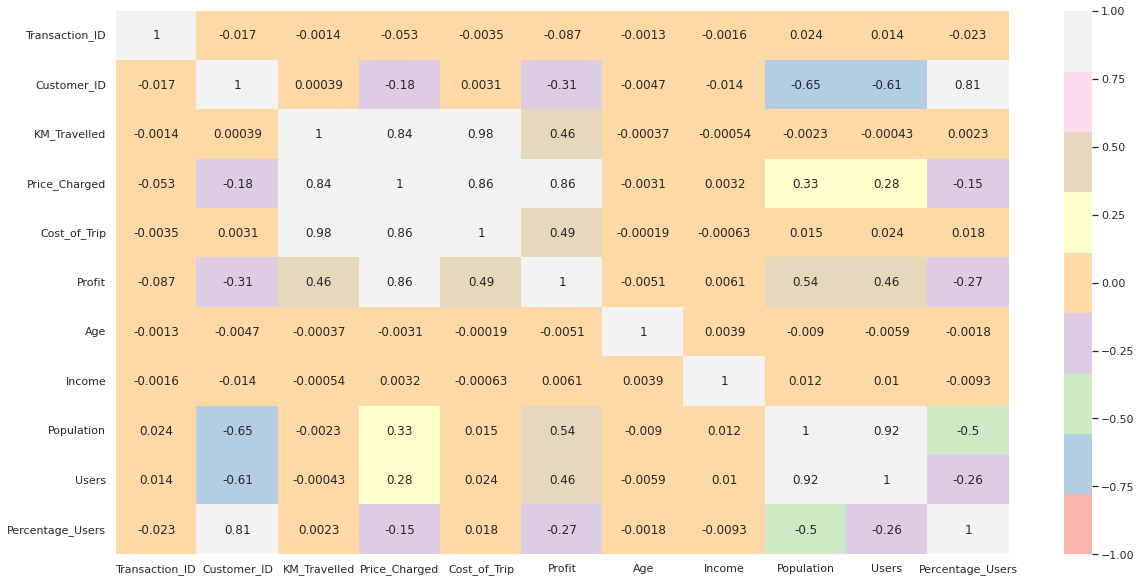

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap="Pastel1")

In [42]:
sns.pairplot(dataset)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Analysis By Date

In [43]:
dataset.Date_of_Travel.nunique()

1095

In [44]:
dataset.groupby(['Date_of_Travel','Company']).Transaction_ID.count().head(20)

Date_of_Travel  Company   
2016-01-01      Pink Cab       41
                Yellow Cab    140
2016-01-02      Pink Cab       52
                Yellow Cab    126
2016-01-03      Pink Cab        4
                Yellow Cab     21
2016-01-04      Pink Cab        6
                Yellow Cab     41
2016-01-05      Pink Cab       23
                Yellow Cab     86
2016-01-06      Pink Cab       24
                Yellow Cab    117
2016-01-07      Pink Cab       21
                Yellow Cab     90
2016-01-08      Pink Cab       57
                Yellow Cab    232
2016-01-09      Pink Cab       67
                Yellow Cab    205
2016-01-10      Pink Cab       13
                Yellow Cab     72
Name: Transaction_ID, dtype: int64

In [45]:
dataset_date = dataset.copy()

In [46]:
months=[]
years =[]
for i in range(len(dataset_date['Date_of_Travel'])):
    months.append(dataset_date['Date_of_Travel'][i].month)
    years.append(dataset_date['Date_of_Travel'][i].year)
dataset_date['Month'] = months
dataset_date['Year'] = years

dataset_date = dataset_date.drop(['Date_of_Travel'],axis=1)

In [47]:
dataset_date

,Transaction_ID,Customer_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Payment_Mode,Gender,Age,Income,Population,Users,Percentage_Users,Month,Year
0,10000011,29290,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,57.315000,Card,Male,28,10813,814885,24701,3.031225,1,2016
1,10000012,27703,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,23.666000,Card,Male,27,9237,814885,24701,3.031225,1,2016
2,10000013,28712,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,27.568000,Cash,Male,53,11242,814885,24701,3.031225,1,2016
3,10000014,28020,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,25.798000,Cash,Male,23,23327,814885,24701,3.031225,1,2016
4,10000015,27182,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,16.844000,Card,Male,33,8536,814885,24701,3.031225,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Yellow Cab,WASHINGTON DC,4.800000,69.240000,63.360000,5.880000,Cash,Male,24,15651,418859,127001,30.320705,1,2018
359388,10440104,53286,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,6.902000,Cash,Male,32,6528,418859,127001,30.320705,1,2018
359389,10440105,52265,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,87.420000,Cash,Male,56,7966,418859,127001,30.320705,1,2018
359390,10440106,52175,Yellow Cab,WASHINGTON DC,8.800000,146.190000,114.048000,32.142000,Card,Male,32,6423,418859,127001,30.320705,1,2018


In [48]:
monthly_transactions = dataset_date.groupby(['Month']).Transaction_ID.count()
monthly_transactions

Month
1     22293
2     18320
3     21744
4     21675
5     23832
6     24476
7     27659
8     32389
9     37003
10    39975
11    43933
12    46093
Name: Transaction_ID, dtype: int64

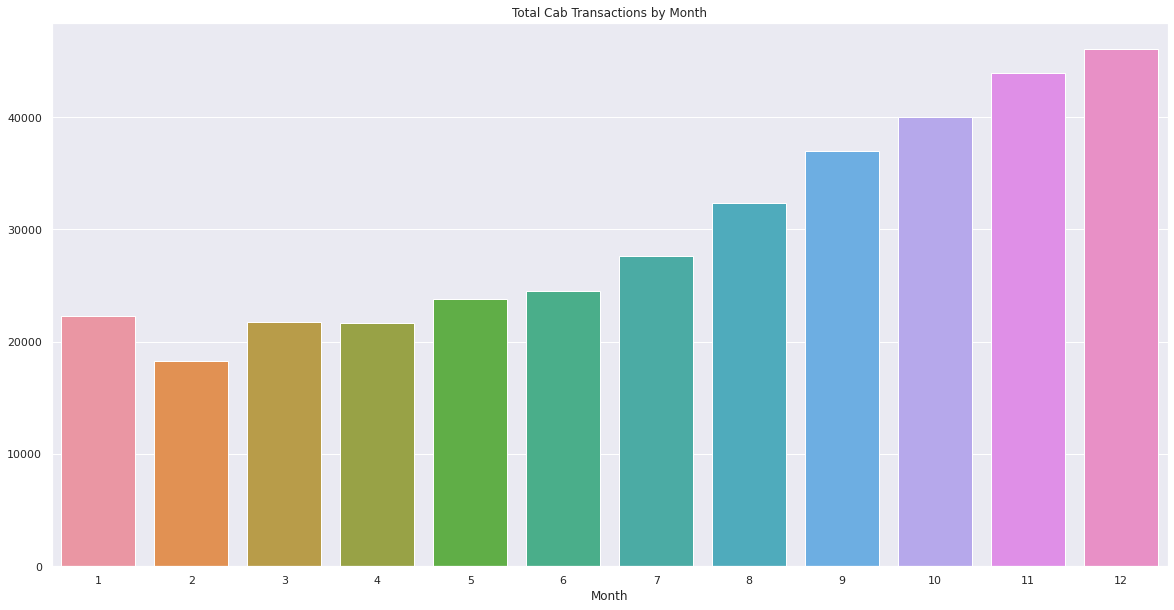

In [49]:
plt.figure(figsize = (20,10))
sns.barplot(x = monthly_transactions.index,y = monthly_transactions.values)
plt.title('Total Cab Transactions by Month')
plt.show()

### Company Analysis

In [50]:
yearly_transactions = dataset_date.groupby(['Year','Company']).Transaction_ID.count()
yearly_transactions

Year  Company   
2016  Pink Cab      25285
      Yellow Cab    82937
2017  Pink Cab      30205
      Yellow Cab    97759
2018  Pink Cab      29221
      Yellow Cab    93985
Name: Transaction_ID, dtype: int64

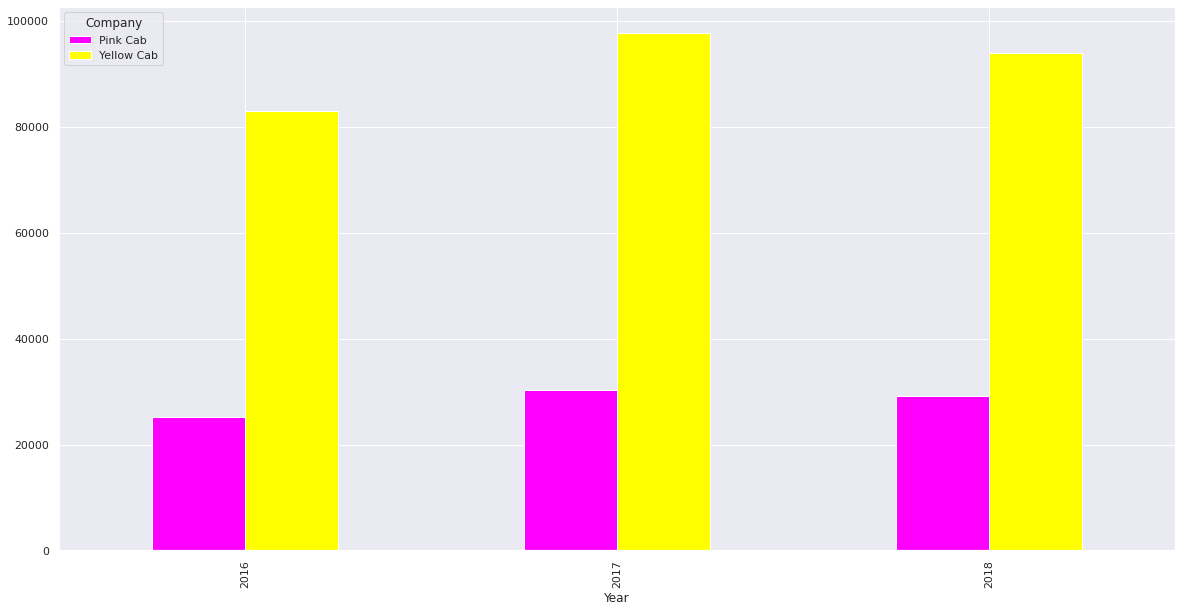

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
yearly_transactions.unstack().plot(ax=ax, kind = 'bar', color = ['magenta','yellow'])

In [52]:
monthly_profits = dataset_date.groupby(['Month','Company']).Profit.mean()
monthly_profits

Month  Company   
1      Pink Cab      73.910162
       Yellow Cab   184.705758
2      Pink Cab      74.796142
       Yellow Cab   199.312910
3      Pink Cab      71.076403
       Yellow Cab   180.311724
4      Pink Cab      59.558302
       Yellow Cab   179.855370
5      Pink Cab      33.792222
       Yellow Cab   210.884085
6      Pink Cab      39.588715
       Yellow Cab   188.934292
7      Pink Cab      45.766444
       Yellow Cab   135.328482
8      Pink Cab      50.812533
       Yellow Cab   121.321650
9      Pink Cab      52.356789
       Yellow Cab   154.901858
10     Pink Cab      64.876744
       Yellow Cab   138.816875
11     Pink Cab      74.292478
       Yellow Cab   144.126880
12     Pink Cab      90.258236
       Yellow Cab   148.427151
Name: Profit, dtype: float64

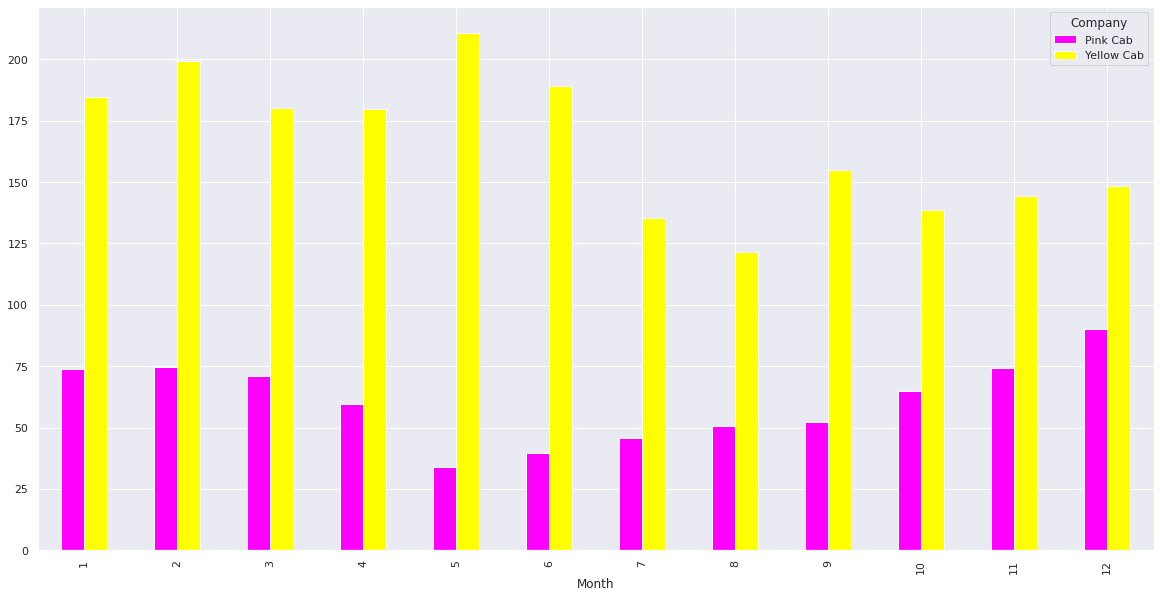

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
monthly_profits.unstack().plot(ax=ax, kind = 'bar', color = ['magenta','yellow'])

In [54]:
yearly_profits = dataset_date.groupby(['Year','Company']).Profit.sum()
yearly_profits

Year  Company   
2016  Pink Cab      1739882.628000
      Yellow Cab   14073886.478800
2017  Pink Cab      2015100.657000
      Yellow Cab   16464267.139200
2018  Pink Cab      1552345.036000
      Yellow Cab   13482219.552800
Name: Profit, dtype: float64

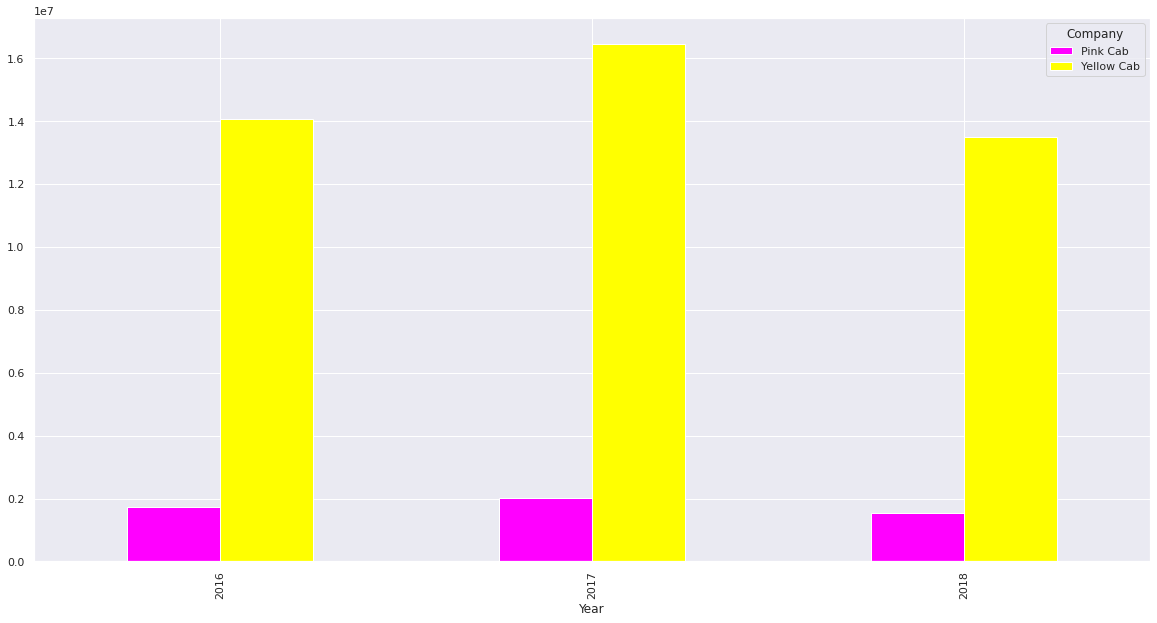

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
yearly_profits.unstack().plot(ax=ax, kind = 'bar', color = ['magenta','yellow'])

In [56]:
yearly_kms = dataset_date.groupby(['Year','Company']).KM_Travelled.mean()
yearly_kms

Year  Company   
2016  Pink Cab     22.472322
      Yellow Cab   22.615081
2017  Pink Cab     22.616605
      Yellow Cab   22.559398
2018  Pink Cab     22.577116
      Yellow Cab   22.539834
Name: KM_Travelled, dtype: float64

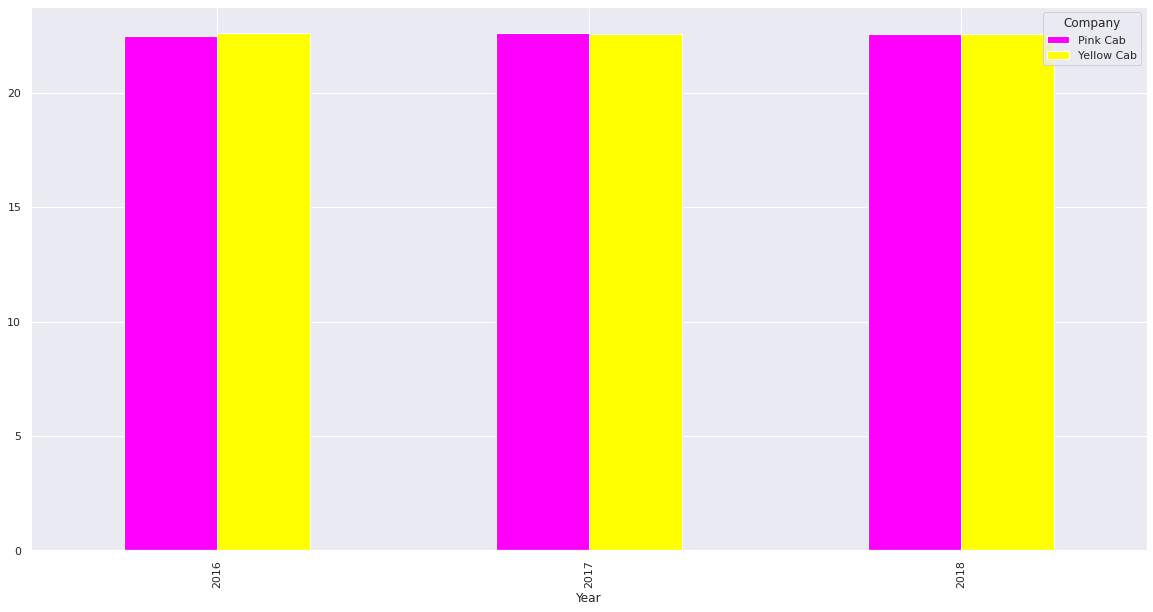

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
yearly_kms.unstack().plot(ax=ax,kind = 'bar', color = ['magenta','yellow'])

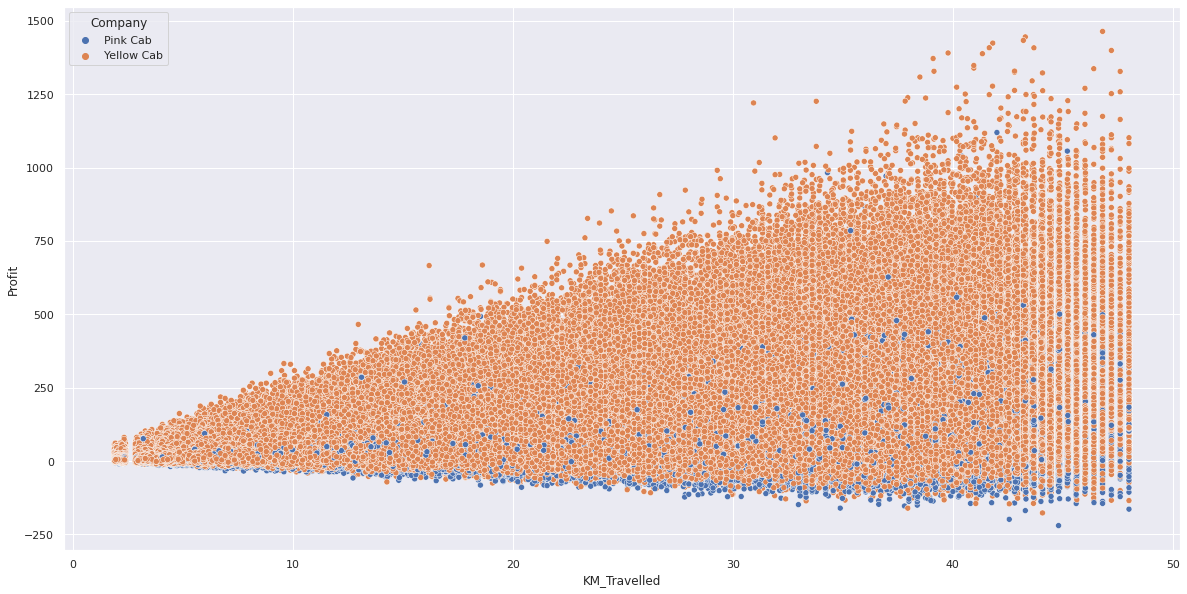

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset_date, x="KM_Travelled", y="Profit", hue="Company")

### City Data Analysis

In [59]:
km_city = dataset_date.groupby(['City','Company']).KM_Travelled.sum()
km_city

City            Company   
ATLANTA GA      Pink Cab       39715.170000
                Yellow Cab    128928.590000
AUSTIN TX       Pink Cab       41038.420000
                Yellow Cab     68168.880000
BOSTON MA       Pink Cab      117933.510000
                Yellow Cab    552454.670000
CHICAGO IL      Pink Cab      210726.130000
                Yellow Cab   1070978.260000
DALLAS TX       Pink Cab       30389.260000
                Yellow Cab    127392.790000
DENVER CO       Pink Cab       31308.150000
                Yellow Cab     54561.600000
LOS ANGELES CA  Pink Cab      449656.770000
                Yellow Cab    639078.880000
MIAMI FL        Pink Cab       44644.450000
                Yellow Cab    100773.720000
NASHVILLE TN    Pink Cab       41474.170000
                Yellow Cab     26850.570000
NEW YORK NY     Pink Cab      315967.270000
                Yellow Cab   1932842.470000
ORANGE COUNTY   Pink Cab       33608.500000
                Yellow Cab     55218.190000
PHOEN

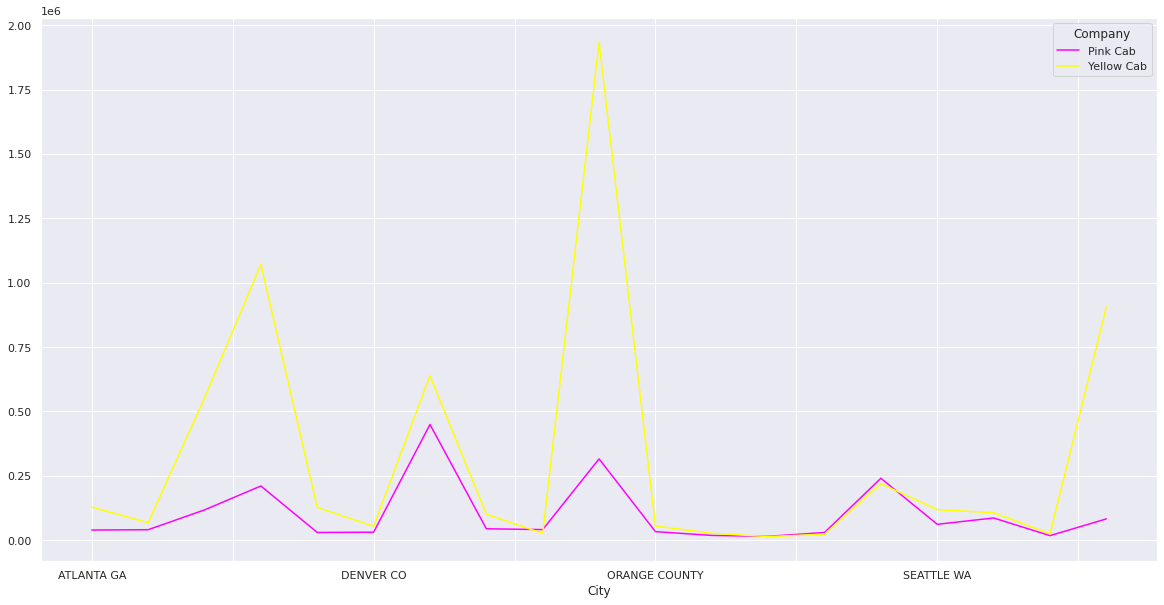

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
km_city.unstack().plot(ax=ax,kind = 'line', color = ['magenta','yellow'])

In [61]:
city_trans = dataset_date.groupby('City').Transaction_ID.count()
city_trans

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

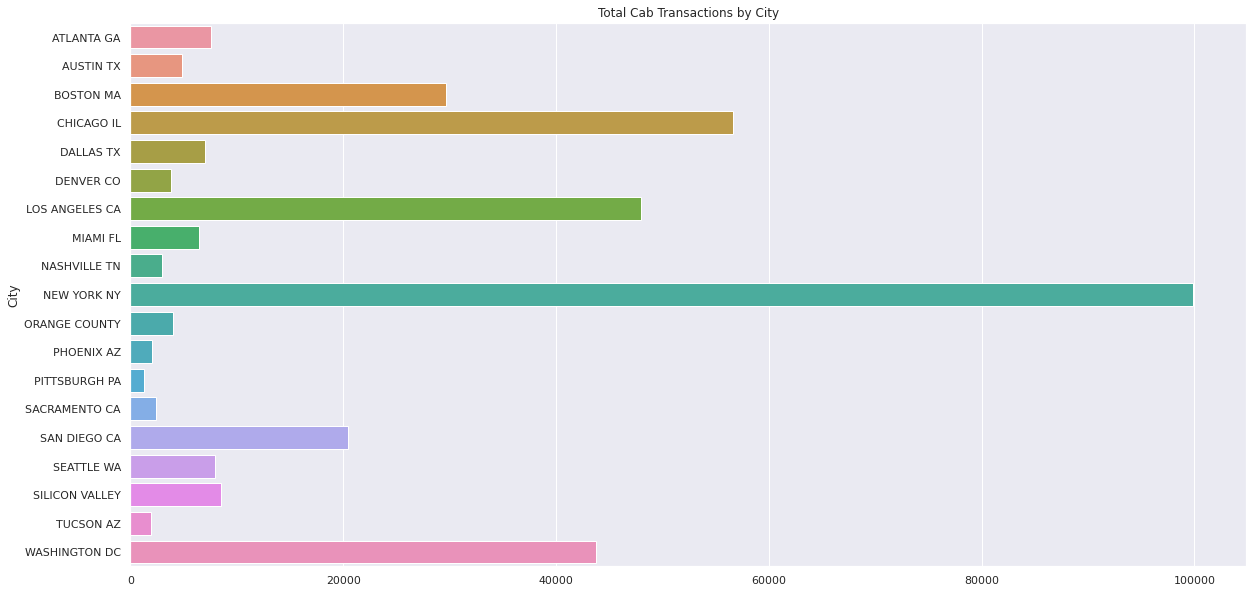

In [62]:
plt.figure(figsize = (20,10))
sns.barplot(x = city_trans.values, y = city_trans.index)
plt.title('Total Cab Transactions by City')
plt.show()

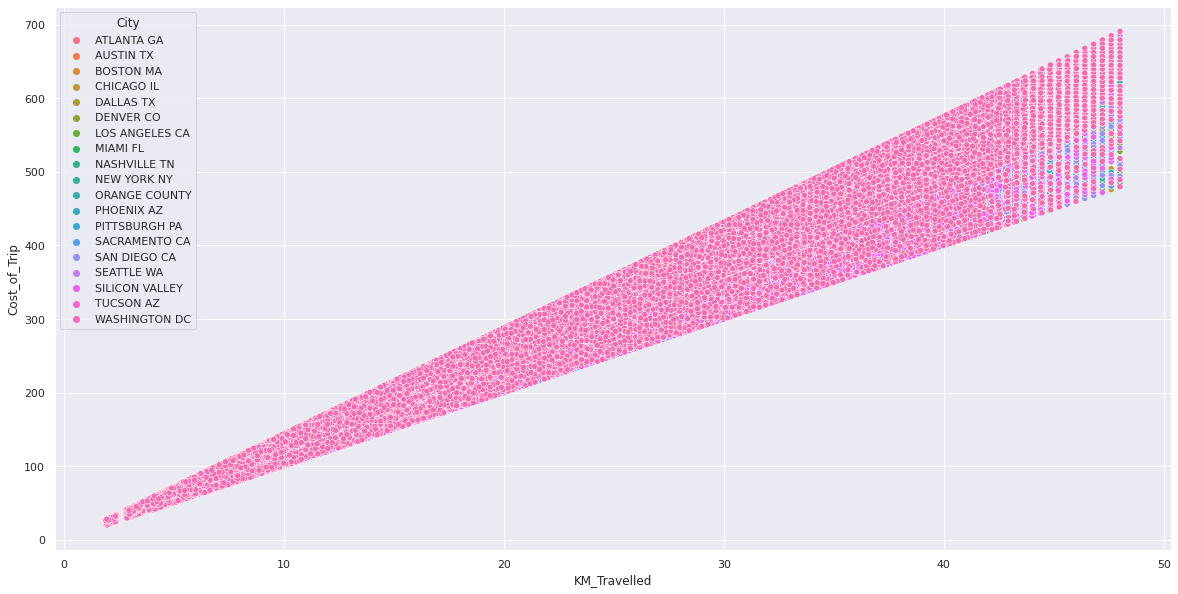

In [63]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset_date, x="KM_Travelled", y="Cost_of_Trip", hue="City")

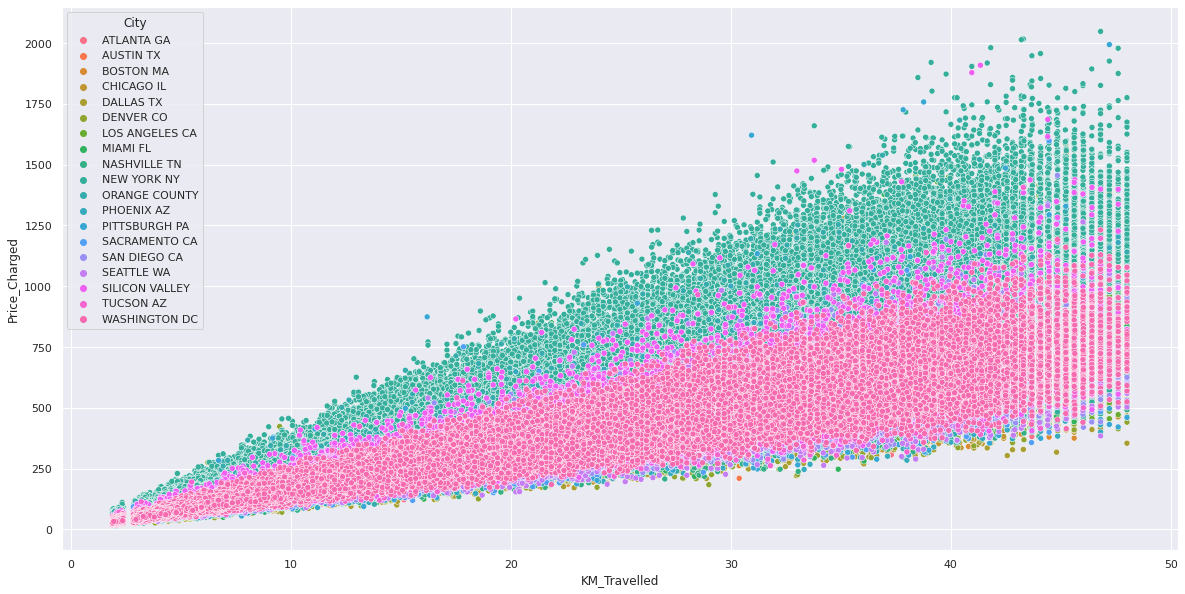

In [64]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset_date, x="KM_Travelled", y="Price_Charged", hue="City")

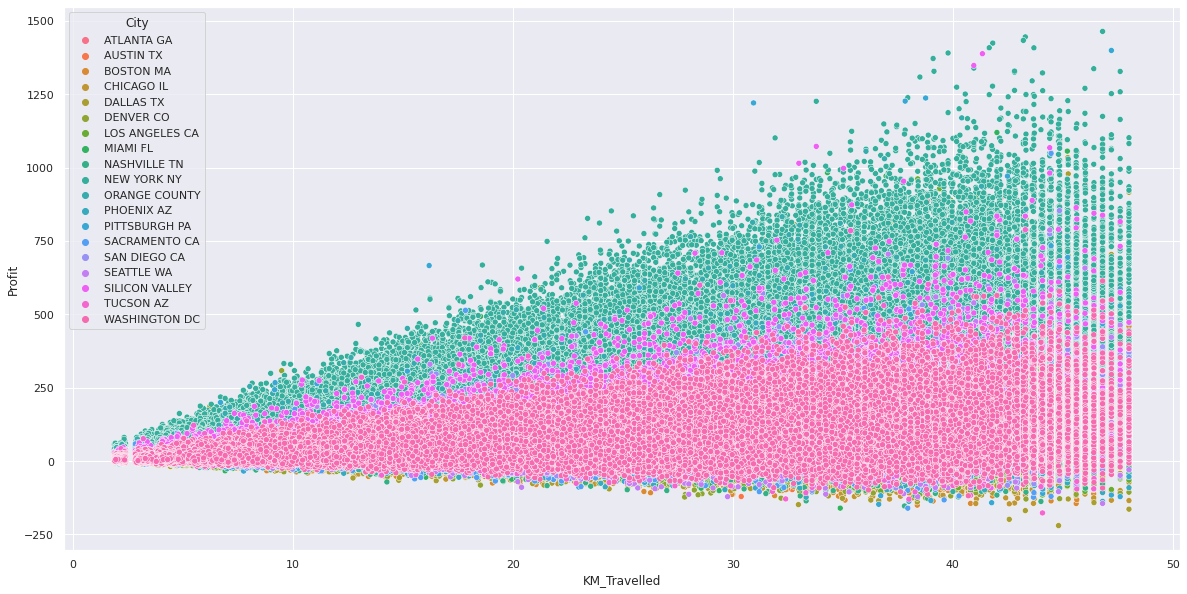

In [65]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset_date, x="KM_Travelled", y="Profit", hue="City")

### Payment Mode and Gender Share

In [66]:
payments = dataset_date.groupby(['Company','Payment_Mode']).Price_Charged.mean()
payments

Company     Payment_Mode
Pink Cab    Card           311.197319
            Cash           310.209299
Yellow Cab  Card           457.924979
            Cash           458.567368
Name: Price_Charged, dtype: float64

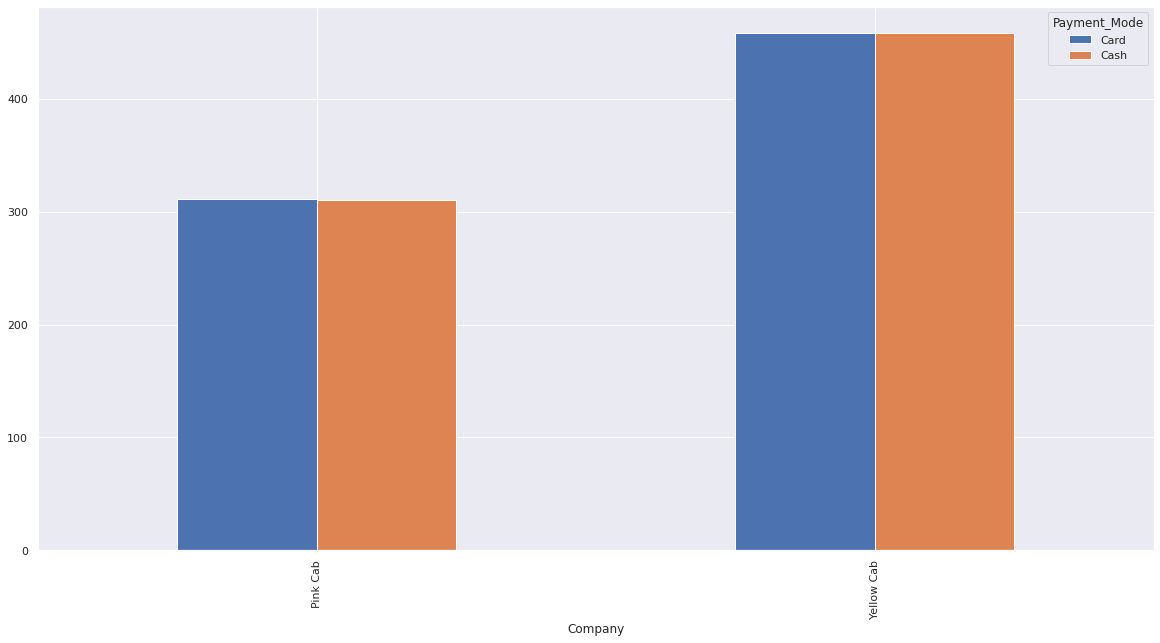

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
payments.unstack().plot(ax=ax,kind = 'bar')

In [68]:
dataset_date[dataset_date.Price_Charged>100].groupby('Payment_Mode').Payment_Mode.count()

Payment_Mode
Card    193758
Cash    129278
Name: Payment_Mode, dtype: int64

In [69]:
dataset_date[dataset_date.Price_Charged<=100].groupby('Payment_Mode').Payment_Mode.count()

Payment_Mode
Card    21746
Cash    14610
Name: Payment_Mode, dtype: int64

In [70]:
gender = dataset_date.groupby(['Company','Gender']).Price_Charged.mean()
gender

Company     Gender
Pink Cab    Female   310.624823
            Male     310.940547
Yellow Cab  Female   454.571538
            Male     460.821326
Name: Price_Charged, dtype: float64

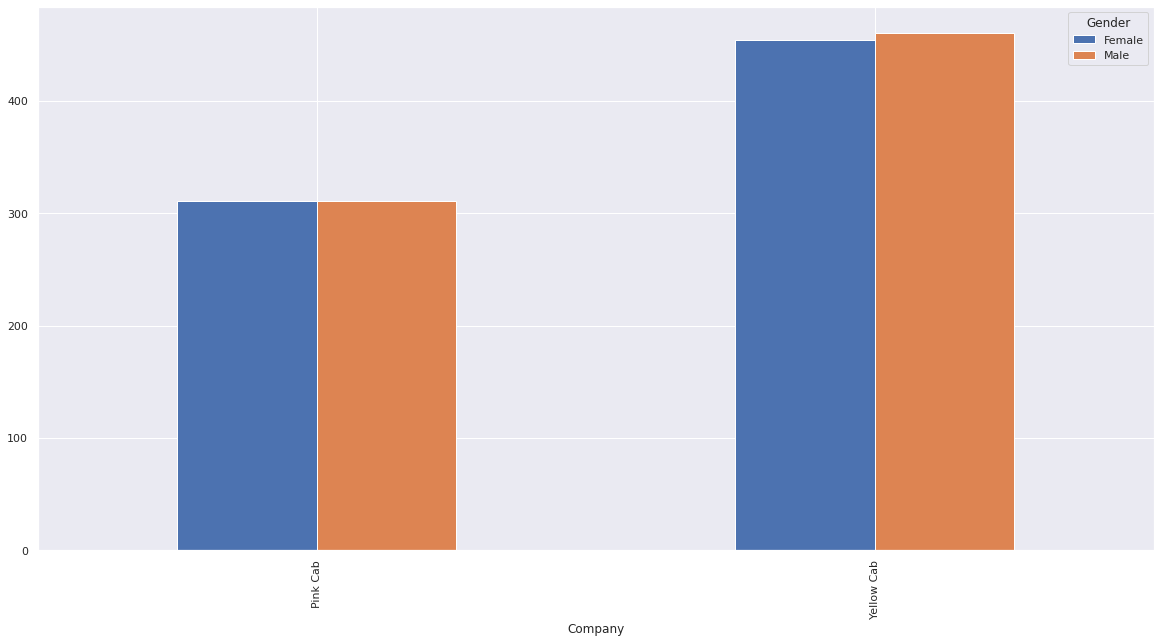

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
gender.unstack().plot(ax=ax,kind = 'bar')

### Age Analysis

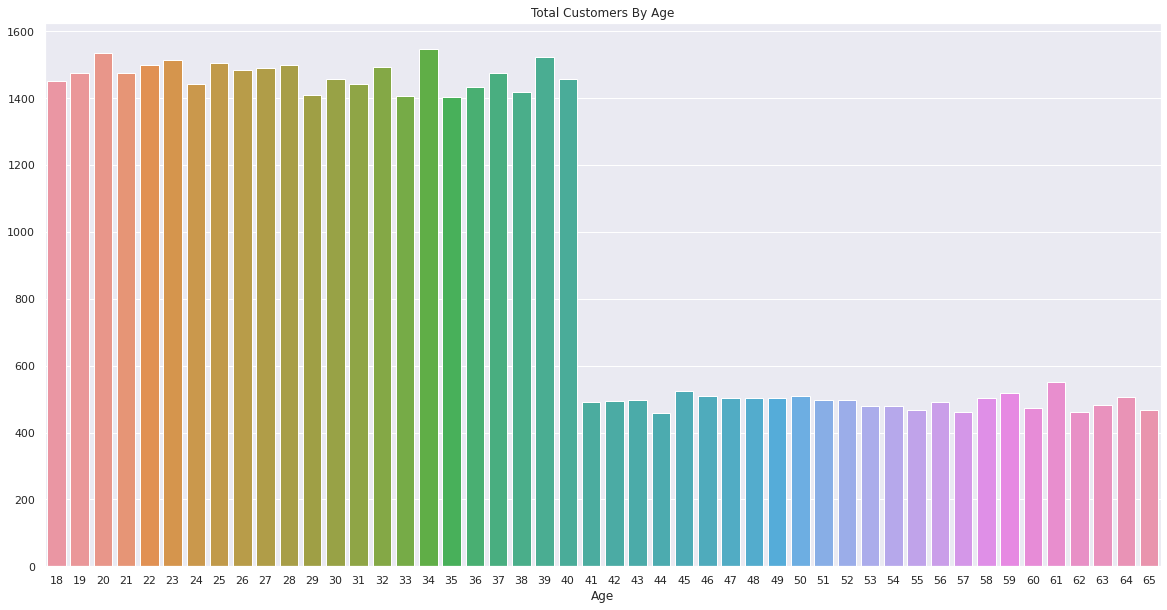

In [72]:
customers_by_age = dataset_date.groupby('Age').Customer_ID.nunique()

plt.figure(figsize=(20,10))
sns.barplot(x=customers_by_age.index,y=customers_by_age.values)
plt.title('Total Customers By Age')
plt.show()

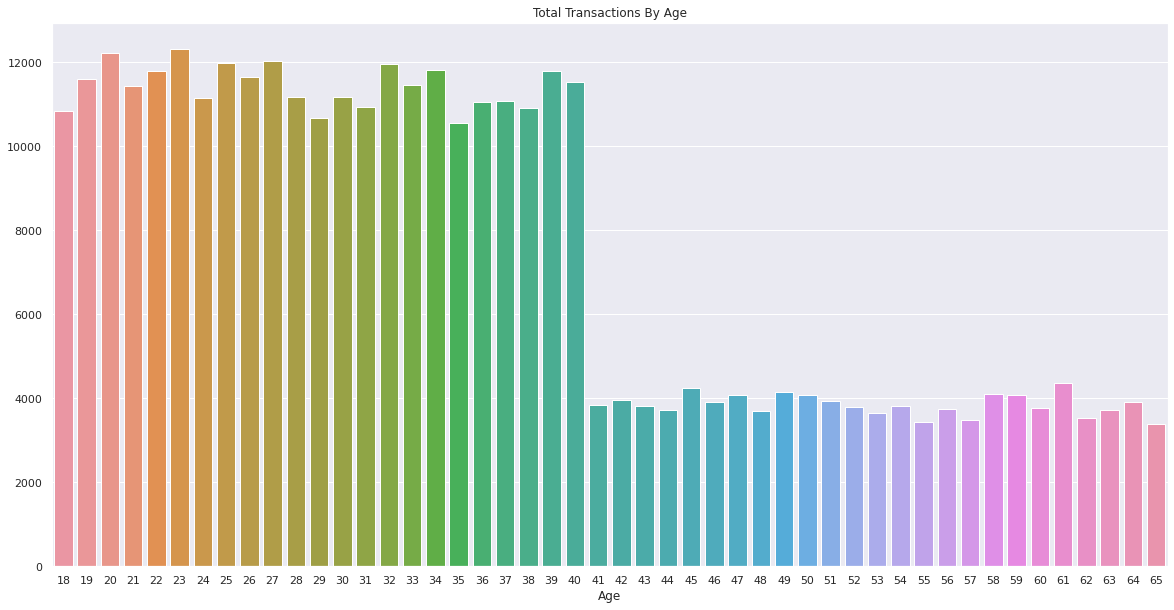

In [73]:
transactions_by_age = dataset_date.groupby('Age').Transaction_ID.count()

plt.figure(figsize=(20,10))
sns.barplot(x=transactions_by_age.index,y=transactions_by_age.values)
plt.title('Total Transactions By Age')
plt.show()

In [74]:
mean_age = dataset_date.groupby('Company').Age.mean()
mean_age

Company
Pink Cab     35.322414
Yellow Cab   35.341112
Name: Age, dtype: float64

In [75]:
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
dataset_date['Age_range'] = pd.cut(dataset_date.Age, bins, labels = labels,include_lowest = True)

dataset_date

,Transaction_ID,Customer_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Payment_Mode,Gender,Age,Income,Population,Users,Percentage_Users,Month,Year,Age_range
0,10000011,29290,Pink Cab,ATLANTA GA,30.450000,370.950000,313.635000,57.315000,Card,Male,28,10813,814885,24701,3.031225,1,2016,20-29
1,10000012,27703,Pink Cab,ATLANTA GA,28.620000,358.520000,334.854000,23.666000,Card,Male,27,9237,814885,24701,3.031225,1,2016,20-29
2,10000013,28712,Pink Cab,ATLANTA GA,9.040000,125.200000,97.632000,27.568000,Cash,Male,53,11242,814885,24701,3.031225,1,2016,50-59
3,10000014,28020,Pink Cab,ATLANTA GA,33.170000,377.400000,351.602000,25.798000,Cash,Male,23,23327,814885,24701,3.031225,1,2016,20-29
4,10000015,27182,Pink Cab,ATLANTA GA,8.730000,114.620000,97.776000,16.844000,Card,Male,33,8536,814885,24701,3.031225,1,2016,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Yellow Cab,WASHINGTON DC,4.800000,69.240000,63.360000,5.880000,Cash,Male,24,15651,418859,127001,30.320705,1,2018,20-29
359388,10440104,53286,Yellow Cab,WASHINGTON DC,8.400000,113.750000,106.848000,6.902000,Cash,Male,32,6528,418859,127001,30.320705,1,2018,30-39
359389,10440105,52265,Yellow Cab,WASHINGTON DC,27.750000,437.070000,349.650000,87.420000,Cash,Male,56,7966,418859,127001,30.320705,1,2018,50-59
359390,10440106,52175,Yellow Cab,WASHINGTON DC,8.800000,146.190000,114.048000,32.142000,Card,Male,32,6423,418859,127001,30.320705,1,2018,30-39


In [76]:
age_range_share = dataset_date.groupby('Age_range').Customer_ID.nunique()
age_range_share

Age_range
18-19     2925
20-29    14853
30-39    14598
40-49     5935
50-59     4899
60+       2938
Name: Customer_ID, dtype: int64

Text(0.5, 1.0, 'Total Customers by Age Range')

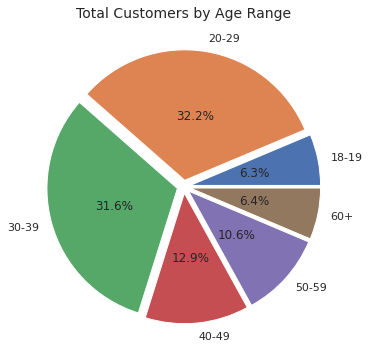

In [77]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_range_share.keys()
plt.pie(x=age_range_share, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Total Customers by Age Range", fontsize=14)

In [78]:
age_range_transactions = dataset_date.groupby('Age_range').Transaction_ID.count()
age_range_transactions

Age_range
18-19     22437
20-29    116430
30-39    112735
40-49     47017
50-59     38087
60+       22686
Name: Transaction_ID, dtype: int64

Text(0.5, 1.0, 'Total Transactions by Age Range')

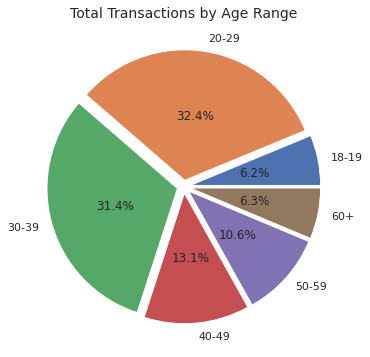

In [79]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_range_transactions.keys()
plt.pie(x=age_range_transactions, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Total Transactions by Age Range", fontsize=14)

In [80]:
age_range_company = dataset_date.groupby(['Age_range', 'Company']).Customer_ID.nunique()
age_range_company

Age_range  Company   
18-19      Pink Cab       2090
           Yellow Cab     2536
20-29      Pink Cab      10384
           Yellow Cab    12835
30-39      Pink Cab      10211
           Yellow Cab    12628
40-49      Pink Cab       4152
           Yellow Cab     5152
50-59      Pink Cab       3402
           Yellow Cab     4238
60+        Pink Cab       2091
           Yellow Cab     2507
Name: Customer_ID, dtype: int64

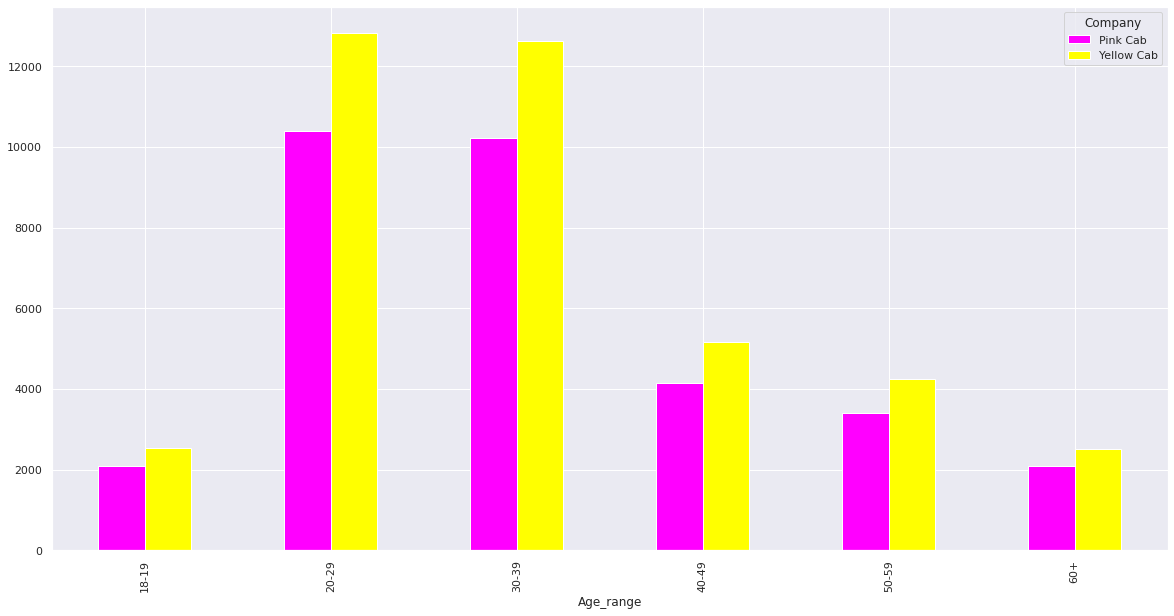

In [81]:
fig, ax = plt.subplots(figsize=(20,10))
age_range_company.unstack().plot(ax=ax,kind = 'bar', color = ['magenta', 'yellow'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b744c2850>],
      dtype=object)

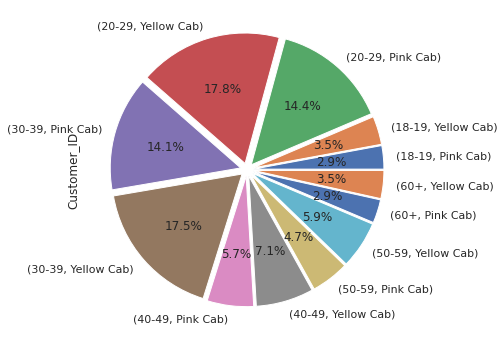

In [82]:
age_range_company.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*12, autopct='%1.1f%%')

In [83]:
age_range_km = dataset_date.groupby('Age_range').KM_Travelled.mean()
age_range_km

Age_range
18-19   22.514467
20-29   22.558898
30-39   22.580063
40-49   22.589205
50-59   22.624186
60+     22.457618
Name: KM_Travelled, dtype: float64

In [84]:
age_range_charged = dataset_date.groupby('Age_range').Price_Charged.mean()
age_range_charged

Age_range
18-19   417.824653
20-29   424.795204
30-39   423.476431
40-49   425.928919
50-59   422.906243
60+     417.647698
Name: Price_Charged, dtype: float64

In [85]:
age_range_profit = dataset_date.groupby('Age_range').Profit.sum()
age_range_profit

Age_range
18-19    2978434.190000
20-29   16152017.241600
30-39   15457736.698000
40-49    6541984.708000
50-59    5181932.735800
60+      3015595.918400
Name: Profit, dtype: float64

### Gender Analysis

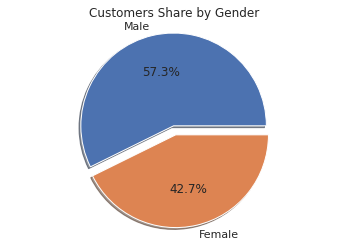

In [86]:
labelscg = 'Male','Female' 
pctcg = [dataset_date[(dataset_date.Gender=='Male') ]['Gender'].count(),dataset_date[(dataset_date.Gender=='Female')]['Gender'].count()]
figcg, axcg = plt.subplots()
axcg.pie(pctcg ,explode = [0.05]*2, labels=labelscg, autopct='%1.1f%%',shadow=True)
axcg.axis('equal')

plt.title('Customers Share by Gender')
plt.show()

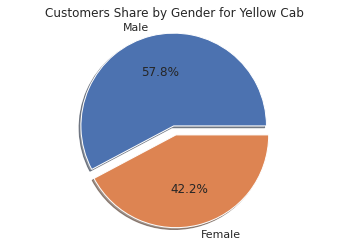

In [87]:
labelscgy = 'Male','Female' 
pctcgy = [dataset_date[(dataset_date.Gender=='Male') & (dataset_date.Company=='Yellow Cab')]['Gender'].count(),dataset_date[(dataset_date.Gender=='Female') & (dataset_date.Company=='Yellow Cab')]['Gender'].count()]
figcgy, axcgy = plt.subplots()
axcgy.pie(pctcgy ,explode = [0.05]*2, labels=labelscgy, autopct='%1.1f%%',shadow=True)
axcgy.axis('equal')

plt.title('Customers Share by Gender for Yellow Cab')
plt.show()

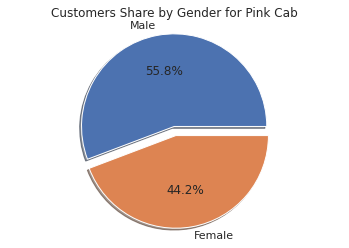

In [88]:
labelscgp = 'Male','Female' 
pctcgp = [dataset_date[(dataset_date.Gender=='Male') & (dataset_date.Company=='Pink Cab')]['Gender'].count(),dataset_date[(dataset_date.Gender=='Female') & (dataset_date.Company=='Pink Cab')]['Gender'].count()]
figcgp, axcgp = plt.subplots()
axcgp.pie(pctcgp ,explode = [0.05]*2, labels=labelscgp, autopct='%1.1f%%',shadow=True)
axcgp.axis('equal')

plt.title('Customers Share by Gender for Pink Cab')
plt.show()

In [89]:
gender_by_company = dataset_date.groupby(['Company', 'Gender']).Customer_ID.nunique()
gender_by_company

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

Text(0.5, 1.0, 'Customers Share by Gender by Company')

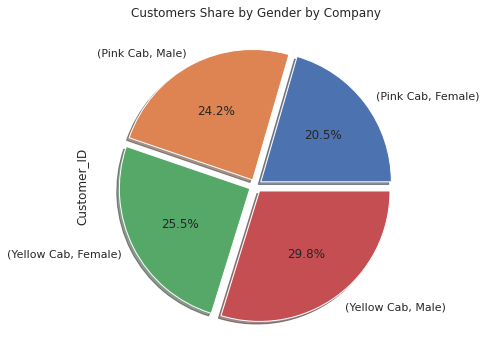

In [90]:
gender_by_company.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*4, autopct='%1.1f%%', shadow=True)
plt.title('Customers Share by Gender by Company')

In [91]:
dataset_date.groupby(['Company','Year','Gender']).Transaction_ID.count()

Company     Year  Gender
Pink Cab    2016  Female    10965
                  Male      14320
            2017  Female    13416
                  Male      16789
            2018  Female    13099
                  Male      16122
Yellow Cab  2016  Female    34161
                  Male      48776
            2017  Female    41603
                  Male      56156
            2018  Female    40236
                  Male      53749
Name: Transaction_ID, dtype: int64

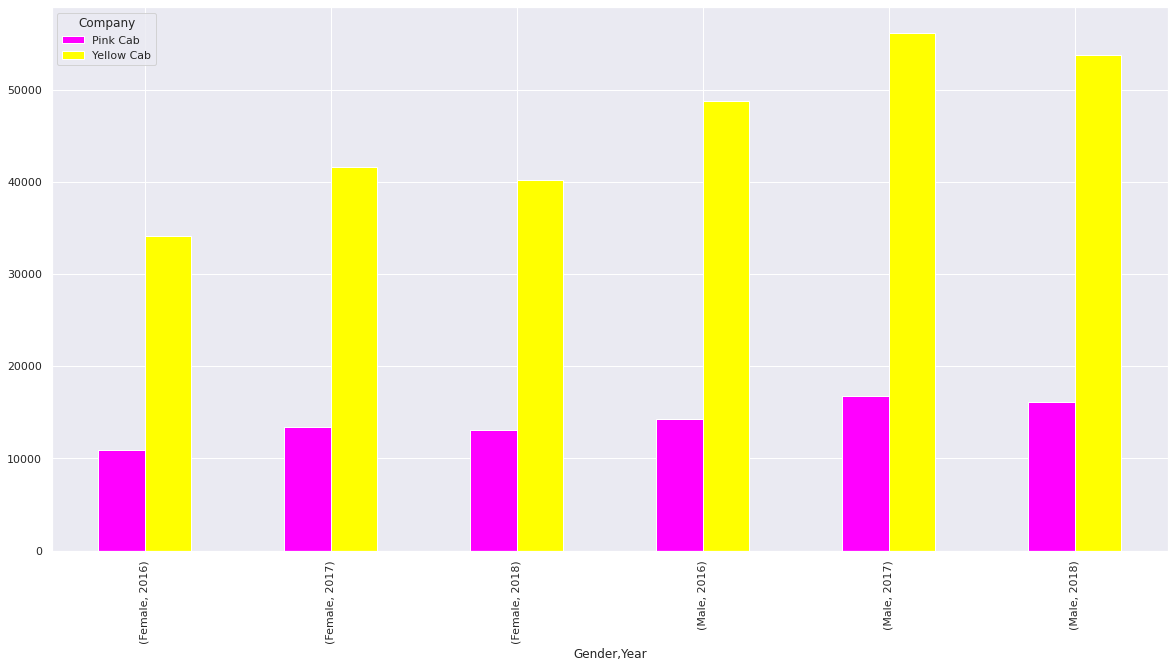

In [92]:
fig, ax = plt.subplots(figsize=(20,10))
dataset_date.groupby(['Gender','Year','Company']).Transaction_ID.count().unstack().plot(ax=ax,kind = 'bar', color = ['magenta', 'yellow'])

### Customer Share Market

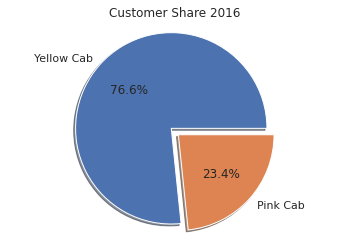

In [93]:
labels2016 = 'Yellow Cab','Pink Cab' 
pct2016 = [dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Yellow Cab')]['Customer_ID'].count(),dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Pink Cab')]['Customer_ID'].count()]
fig2016, ax2016 = plt.subplots()
ax2016.pie(pct2016 ,explode = [0.05]*2, labels=labels2016, autopct='%1.1f%%',shadow=True)
ax2016.axis('equal')

plt.title('Customer Share 2016')
plt.show()

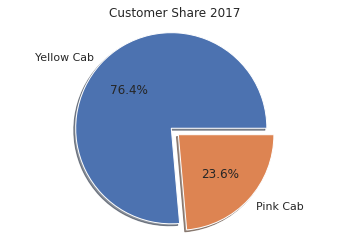

In [94]:
labels2017 = 'Yellow Cab','Pink Cab' 
pct2017 = [dataset_date[(dataset_date.Year==2017) & (dataset_date.Company=='Yellow Cab')]['Customer_ID'].count(),dataset_date[(dataset_date.Year==2017) & (dataset_date.Company=='Pink Cab')]['Customer_ID'].count()]
fig2017, ax2017 = plt.subplots()
ax2017.pie(pct2017 ,explode = [0.05]*2, labels=labels2017, autopct='%1.1f%%',shadow=True)
ax2017.axis('equal')

plt.title('Customer Share 2017')
plt.show()

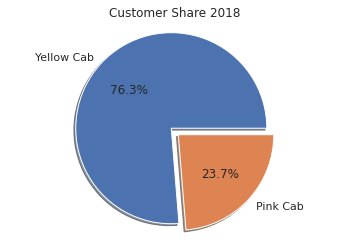

In [95]:
labels2018 = 'Yellow Cab','Pink Cab' 
pct2018 = [dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Yellow Cab')]['Customer_ID'].count(),dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Pink Cab')]['Customer_ID'].count()]
fig2018, ax2018 = plt.subplots()
ax2018.pie(pct2018 ,explode = [0.05]*2, labels=labels2018, autopct='%1.1f%%',shadow=True)
ax2018.axis('equal')

plt.title('Customer Share 2018')
plt.show()

In [96]:
customer_share_year = dataset_date.groupby(['Year', 'Company']).Customer_ID.nunique()
customer_share_year

Year  Company   
2016  Pink Cab      16751
      Yellow Cab    26043
2017  Pink Cab      18582
      Yellow Cab    27749
2018  Pink Cab      18361
      Yellow Cab    27424
Name: Customer_ID, dtype: int64

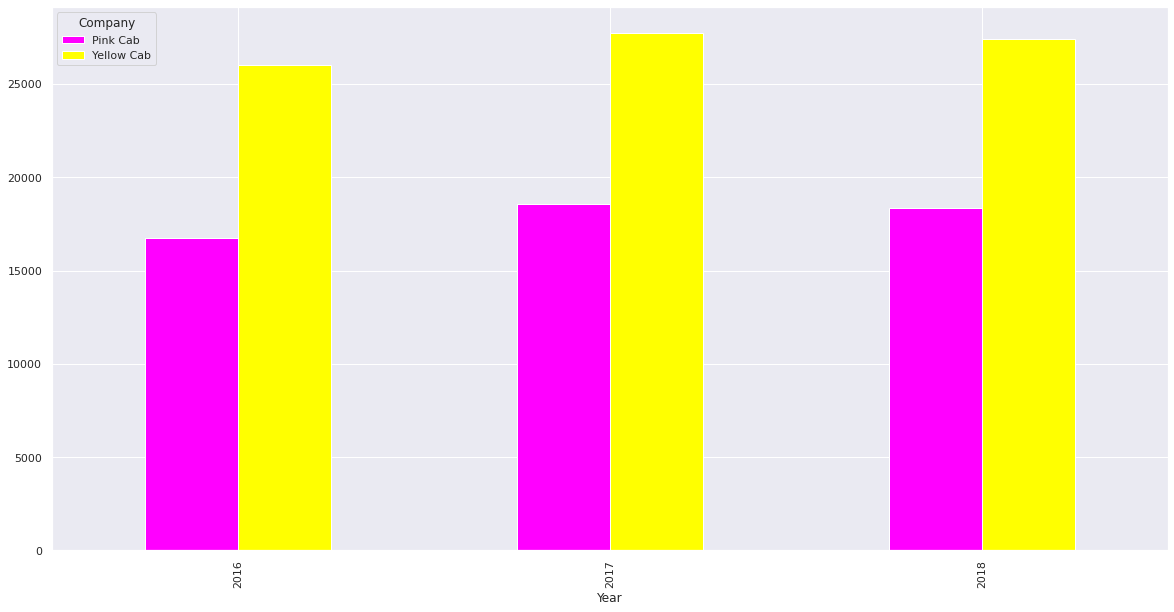

In [97]:
fig, ax = plt.subplots(figsize=(20,10))
customer_share_year.unstack().plot(ax=ax,kind = 'bar', color = ['magenta', 'yellow'])

In [98]:
km_share_year = dataset_date.groupby(['Year', 'Company']).KM_Travelled.sum()
km_share_year

Year  Company   
2016  Pink Cab      568212.650000
      Yellow Cab   1875626.960000
2017  Pink Cab      683134.550000
      Yellow Cab   2205384.190000
2018  Pink Cab      659725.910000
      Yellow Cab   2118406.320000
Name: KM_Travelled, dtype: float64

Text(0.5, 1.0, 'Customers Share by KM Travelled')

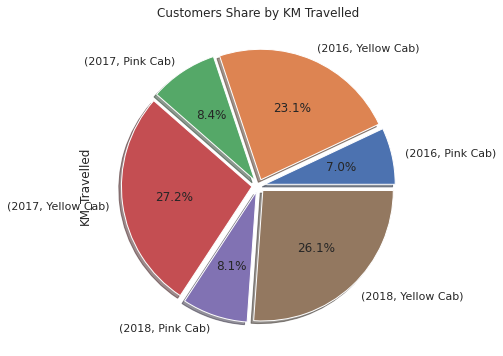

In [99]:
km_share_year.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*6, autopct='%1.1f%%', shadow=True)
plt.title('Customers Share by KM Travelled')

### Age and Customer Share

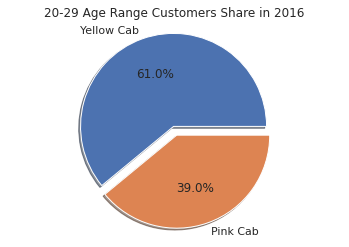

In [100]:
labelsyp_20_2016 = 'Yellow Cab','Pink Cab' 
pctyp_20_2016 = [dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '20-29') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '20-29')]['Customer_ID'].nunique() ]
figyp_20_2016, axyp_20_2016 = plt.subplots()
axyp_20_2016.pie(pctyp_20_2016 ,explode = [0.05]*2, labels=labelsyp_20_2016, autopct='%1.1f%%',shadow=True)
axyp_20_2016.axis('equal')

plt.title('20-29 Age Range Customers Share in 2016')
plt.show()

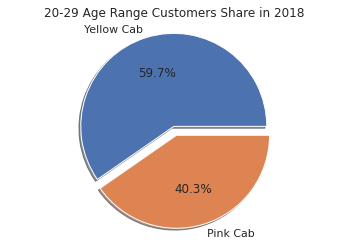

In [101]:
labelsyp_20_2018 = 'Yellow Cab','Pink Cab' 
pctyp_20_2018 = [dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '20-29') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '20-29')]['Customer_ID'].nunique() ]
figyp_20_2018, axyp_20_2018 = plt.subplots()
axyp_20_2018.pie(pctyp_20_2018 ,explode = [0.05]*2, labels=labelsyp_20_2018, autopct='%1.1f%%',shadow=True)
axyp_20_2018.axis('equal')

plt.title('20-29 Age Range Customers Share in 2018')
plt.show()

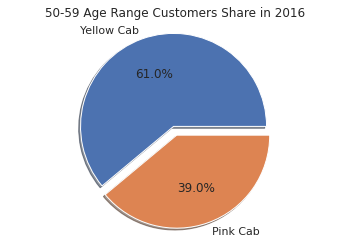

In [102]:
labelsyp_50_2016 = 'Yellow Cab','Pink Cab' 
pctyp_50_2016 = [dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '50-59') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2016) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '50-59')]['Customer_ID'].nunique() ]
figyp_50_2016, axyp_50_2016 = plt.subplots()
axyp_50_2016.pie(pctyp_50_2016 ,explode = [0.05]*2, labels=labelsyp_50_2016, autopct='%1.1f%%',shadow=True)
axyp_50_2016.axis('equal')

plt.title('50-59 Age Range Customers Share in 2016')
plt.show()

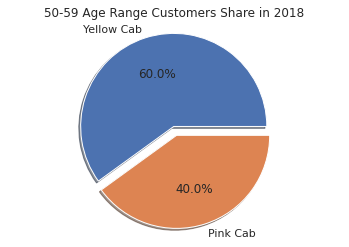

In [103]:
labelsyp_50_2018 = 'Yellow Cab','Pink Cab' 
pctyp_50_2018 = [dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Yellow Cab') &(dataset_date.Age_range == '50-59') ]['Customer_ID'].nunique(), dataset_date[(dataset_date.Year==2018) & (dataset_date.Company=='Pink Cab') & (dataset_date.Age_range == '50-59')]['Customer_ID'].nunique() ]
figyp_50_2018, axyp_50_2018 = plt.subplots()
axyp_50_2018.pie(pctyp_50_2018 ,explode = [0.05]*2, labels=labelsyp_50_2018, autopct='%1.1f%%',shadow=True)
axyp_50_2018.axis('equal')

plt.title('50-59 Age Range Customers Share in 2018')
plt.show()

### Most Frequent Customers

In [104]:
dataset_date[dataset_date.Company=='Yellow Cab'].groupby('Customer_ID').Transaction_ID.count().sort_values(ascending=False).head(20)

Customer_ID
1803    47
1360    47
494     47
636     46
126     45
2766    45
903     45
1673    44
2577    44
992     44
1070    44
2539    44
2895    43
205     43
1628    43
1103    42
83      42
2057    42
2535    42
1315    42
Name: Transaction_ID, dtype: int64

In [105]:
dataset_date[dataset_date.Company=='Pink Cab'].groupby('Customer_ID').Transaction_ID.count().sort_values(ascending=False).head(20)

Customer_ID
8120    18
8595    17
6159    17
7927    17
8915    16
8474    16
7340    16
7938    15
8119    15
7764    15
6416    15
8876    15
7988    15
8721    15
6016    14
6237    14
6331    14
8161    14
6543    14
7442    14
Name: Transaction_ID, dtype: int64

In [106]:
common_cust = dataset_date[dataset_date.Customer_ID==8474].groupby('Company').Transaction_ID.count()
common_cust

Company
Pink Cab      16
Yellow Cab    11
Name: Transaction_ID, dtype: int64

### Analysing Profits

In [107]:
dataset_correlation = dataset_date[['KM_Travelled','Price_Charged','Cost_of_Trip','Profit','Age', 'Income','Percentage_Users','Month','Year']]
dataset_correlation.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Age,Income,Percentage_Users,Month,Year
KM_Travelled,1.000000,0.835753,0.981848,0.462768,-0.000369,-0.000544,0.002305,-0.001773,-0.001094
Price_Charged,0.835753,1.000000,0.859812,0.864154,-0.003084,0.003228,-0.150070,-0.059639,-0.036903
Cost_of_Trip,0.981848,0.859812,1.000000,0.486056,-0.000189,-0.000633,0.018128,-0.008309,-0.001766
Profit,0.462768,0.864154,0.486056,1.000000,-0.005093,0.006148,-0.274715,-0.093886,-0.061420
Age,-0.000369,-0.003084,-0.000189,-0.005093,1.000000,0.003907,-0.001778,-0.002376,-0.000497
Income,-0.000544,0.003228,-0.000633,0.006148,0.003907,1.000000,-0.009332,0.000585,-0.001679
Percentage_Users,0.002305,-0.150070,0.018128,-0.274715,-0.001778,-0.009332,1.000000,-0.060591,-0.003045
Month,-0.001773,-0.059639,-0.008309,-0.093886,-0.002376,0.000585,-0.060591,1.000000,-0.033169
Year,-0.001094,-0.036903,-0.001766,-0.061420,-0.000497,-0.001679,-0.003045,-0.033169,1.000000


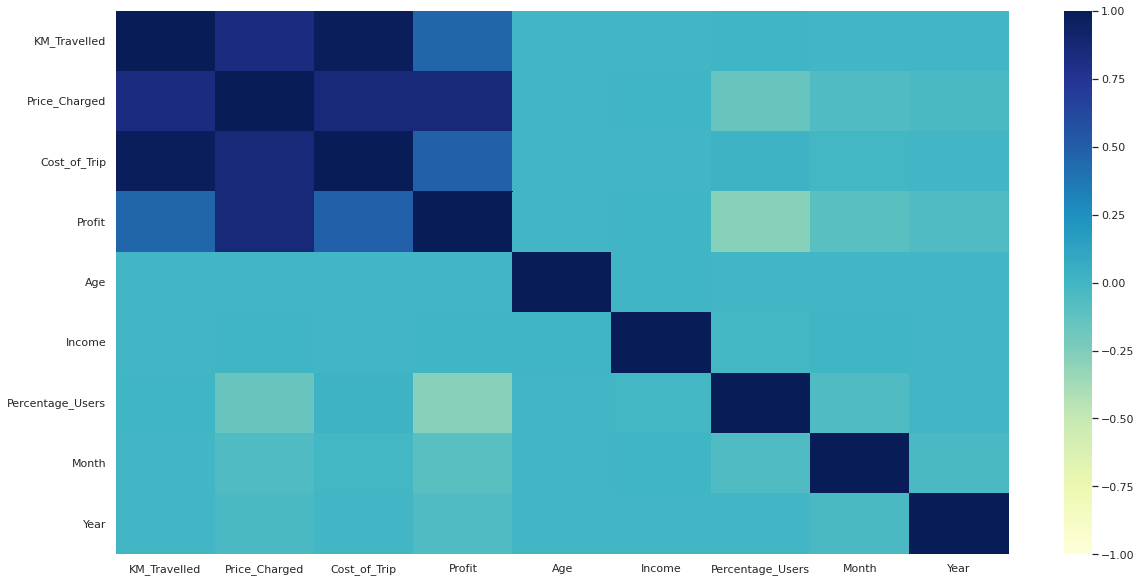

In [108]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset_correlation.corr(),cmap='YlGnBu',annot=False, vmin = -1, vmax = 1) 

In [114]:
city_profits = dataset_date[dataset_date.Month == 12].groupby('City').Profit.mean().sort_values(ascending=False)
city_profits

City
NEW YORK NY      258.421581
SILICON VALLEY   167.087114
DENVER CO        111.138893
DALLAS TX        109.465216
MIAMI FL         100.150911
ATLANTA GA        96.252930
AUSTIN TX         91.891400
TUCSON AZ         84.105100
LOS ANGELES CA    81.752667
NASHVILLE TN      81.459593
PHOENIX AZ        76.922806
SEATTLE WA        76.515311
ORANGE COUNTY     76.134553
SAN DIEGO CA      70.382592
WASHINGTON DC     62.742899
BOSTON MA         62.360750
PITTSBURGH PA     57.105846
CHICAGO IL        52.396687
SACRAMENTO CA     27.119039
Name: Profit, dtype: float64

### NY Profits by Company

As seen above, New York city has the highest profits margins.

In [115]:
ny_profit_yc = dataset_date[(dataset_date.Company=='Yellow Cab')&(dataset_date.City=='NEW YORK NY')].groupby(['Year','Month']).Profit.mean()
ny_profit_yc.head()

Year  Month
2016  1       400.417660
      2       440.392652
      3       346.322294
      4       351.032424
      5       397.785122
Name: Profit, dtype: float64

In [116]:
yc_profit = pd.DataFrame({'Yellow_Profits':ny_profit_yc.values,'Yellow_Transactions':dataset_date[dataset_date.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values, 'Yellow_Transactions':dataset_date[dataset_date.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values, 'Yellow_KM':dataset_date[dataset_date.Company=='Yellow Cab'].groupby(['Year','Month']).KM_Travelled.sum().values})
yc_profit.head()

,Yellow_Profits,Yellow_Transactions,Yellow_KM
0,400.417660,3805,86577.060000
1,440.392652,4676,105441.110000
2,346.322294,5204,118499.000000
3,351.032424,5556,126609.160000
4,397.785122,5731,127960.500000


In [117]:
yc_profit.corr()

,Yellow_Profits,Yellow_Transactions,Yellow_KM
Yellow_Profits,1.000000,-0.757802,-0.760097
Yellow_Transactions,-0.757802,1.000000,0.999839
Yellow_KM,-0.760097,0.999839,1.000000


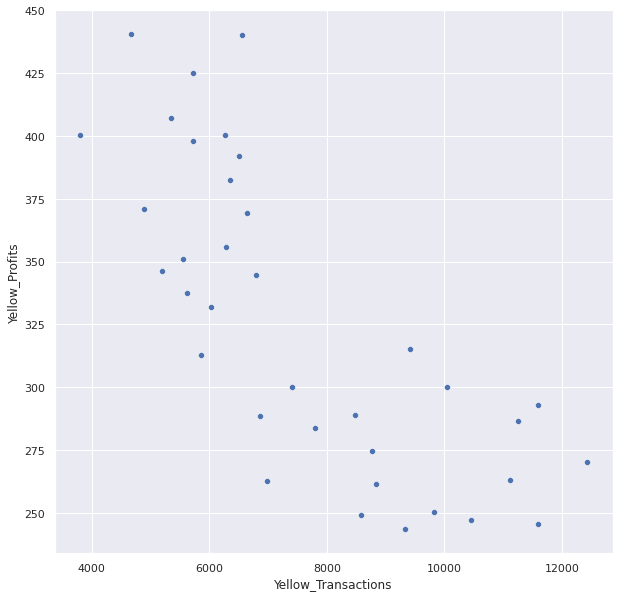

In [118]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = yc_profit.Yellow_Transactions,y = yc_profit.Yellow_Profits)

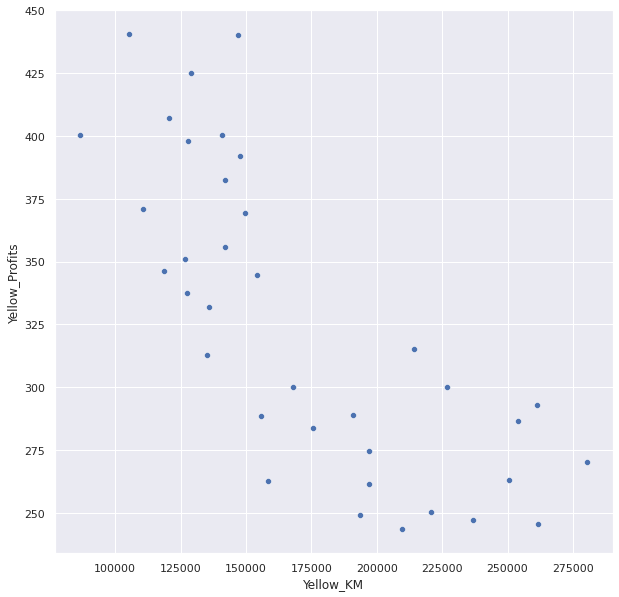

In [119]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = yc_profit.Yellow_KM,y = yc_profit.Yellow_Profits)

In [120]:
ny_profit_pc = dataset_date[(dataset_date.Company=='Pink Cab')&(dataset_date.City=='NEW YORK NY')].groupby(['Year','Month']).Profit.mean()
ny_profit_pc.head()

Year  Month
2016  1        92.129950
      2       128.252194
      3       114.224000
      4        86.026009
      5        45.842417
Name: Profit, dtype: float64

In [121]:
pc_profit = pd.DataFrame({'Pink_Profits':ny_profit_pc.values,'Pink_Transactions':dataset_date[dataset_date.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values,'Pink_KM':dataset_date[dataset_date.Company=='Pink Cab'].groupby(['Year','Month']).KM_Travelled.sum().values})
pc_profit.head()

,Pink_Profits,Pink_Transactions,Pink_KM
0,92.129950,940,21290.340000
1,128.252194,1054,23487.210000
2,114.224000,1244,28281.600000
3,86.026009,1292,28410.190000
4,45.842417,1519,34127.740000


In [122]:
pc_profit.corr()

,Pink_Profits,Pink_Transactions,Pink_KM
Pink_Profits,1.000000,0.499097,0.496922
Pink_Transactions,0.499097,1.000000,0.999691
Pink_KM,0.496922,0.999691,1.000000


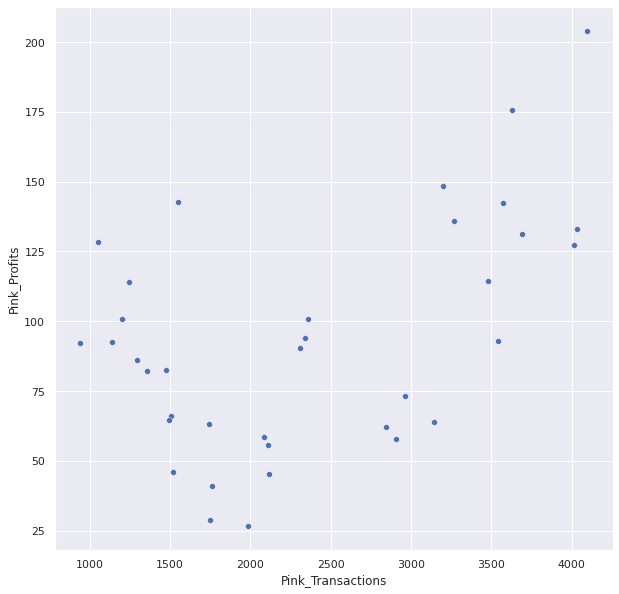

In [123]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_profit.Pink_Transactions,y = pc_profit.Pink_Profits)

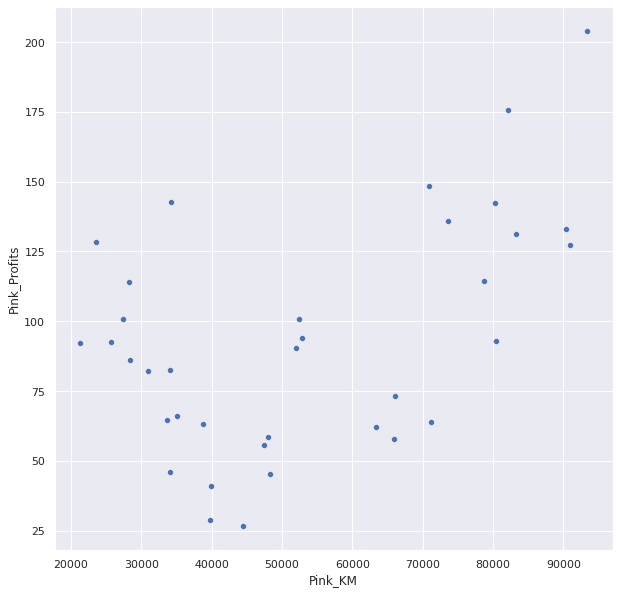

In [124]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_profit.Pink_KM,y = pc_profit.Pink_Profits)

In [125]:
dataset_date.groupby(['Gender','Company']).Profit.mean()

Gender  Company   
Female  Pink Cab      62.180701
        Yellow Cab   156.305325
Male    Pink Cab      63.026310
        Yellow Cab   163.150948
Name: Profit, dtype: float64

### Hypothesis

#### One
H0: KMs Travelled and Profit gained are not related. (p = 0)

H1: KMs Travelled and Profit gained are related. (p != 0)

In [126]:
data1 = dataset_date['KM_Travelled']

In [127]:
data2 = dataset_date['Profit']
data2

0        57.315000
1        23.666000
2        27.568000
3        25.798000
4        16.844000
            ...   
359387    5.880000
359388    6.902000
359389   87.420000
359390   32.142000
359391   13.960800
Name: Profit, Length: 359392, dtype: float64

In [129]:
from scipy.stats import pearsonr

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('KMs Travelled and Profit gained are not related.')
else:
    print('KMs Travelled and Profit gained are related.')

stat=0.463, p=0.000
KMs Travelled and Profit gained are related.


####Two
H0: There is no difference in KM Travelled by Females compared to Males for Yellow Cab.

H1: There is a difference in KM Travelled by Females compared to Males for Yellow Cab.

In [130]:
dataf_KM = dataset_date[(dataset_date.Gender=='Female')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
datam_KM = dataset_date[(dataset_date.Gender=='Male')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
print(dataf_KM.shape[0],datam_KM.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(dataf_KM.values,datam_KM.values,equal_var=True)
if(p_value > 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternate hypothesis')
    
print('P value is ', p_value)

116000 158681
Accept null hypothesis
P value is  0.5146654429411317


#### Three
H0: Females bring in less profits than Males for Yellow Cab.

H1: Females bring in more profits than Males for Yellow Cab.

In [131]:
datafy_Profit = dataset_date[(dataset_date.Gender=='Female')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
datamy_Profit = dataset_date[(dataset_date.Gender=='Male')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(datafy_Profit.shape[0],datamy_Profit.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(datafy_Profit.values,datamy_Profit.values,equal_var=True)
if(p_value > 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

116000 158681
Accept alternative hypothesis
P value is  6.060473042494144e-25


H0: Females bring in less profits than Males for Pink Cab.

H1: Females bring in more profits than Males for Pink Cab.

In [132]:
datafp_Profit = dataset_date[(dataset_date.Gender=='Female')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
datamp_Profit = dataset_date[(dataset_date.Gender=='Male')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(datafp_Profit.shape[0],datamp_Profit.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(datafp_Profit.values,datamp_Profit.values,equal_var=True)
if(p_value > 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

37480 47231
Accept null hypothesis
P value is  0.11515305900425798


#### Four
H0: The mean Profit for the different Age groups for Yellow Cab are equal.

H1: One or more of the mean Profits for the different Age groups for Yellow Cab are unequal.

In [133]:
age18_y = dataset_date[(dataset_date.Age_range == '18-19')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age20_y = dataset_date[(dataset_date.Age_range == '20-29')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age30_y = dataset_date[(dataset_date.Age_range == '30-39')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age40_y = dataset_date[(dataset_date.Age_range == '40-49')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age50_y = dataset_date[(dataset_date.Age_range == '50-59')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
age60_y = dataset_date[(dataset_date.Age_range == '60+')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

In [134]:
from scipy.stats import f_oneway

stat, p = f_oneway(age18_y.values, age20_y.values, age30_y.values, age40_y.values, age50_y.values, age60_y.values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('There is no difference in Profit due to Age')
else:
    print('There is a difference in Profit due to Age')

stat=9.610, p=0.000
There is a difference in Profit due to Age


H0: The mean Profit for the different Age groups for Pink Cab are equal.

H1: One or more of the mean Profits for the different Age groups for Pink Cab are unequal.

In [135]:
age18_p = dataset_date[(dataset_date.Age_range == '18-19')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age20_p = dataset_date[(dataset_date.Age_range == '20-29')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age30_p = dataset_date[(dataset_date.Age_range == '30-39')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age40_p = dataset_date[(dataset_date.Age_range == '40-49')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age50_p = dataset_date[(dataset_date.Age_range == '50-59')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
age60_p = dataset_date[(dataset_date.Age_range == '60+')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

#### Five
H0: There is no difference in Profits for Card and Cash Payers for Yellow Cab.

H1: There is a difference in Profits for Card and Cash Payers for Yellow Cab.

In [136]:
ypay_cash = dataset_date[(dataset_date.Payment_Mode=='Cash')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
ypay_card = dataset_date[(dataset_date.Payment_Mode=='Card')&(dataset_date.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(ypay_cash.shape[0],ypay_card.shape[0])

_, p_value = stats.ttest_ind(ypay_cash.values,ypay_card.values,equal_var=True)
if(p_value > 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

109896 164785
Accept null hypothesis
P value is  0.2933060638298729


H0: There is no difference in Profits for Card and Cash Payers for Pink Cab.

H1: There is a difference in Profits for Card and Cash Payers for Pink Cab.

In [137]:
ppay_cash = dataset_date[(dataset_date.Payment_Mode=='Cash')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
ppay_card = dataset_date[(dataset_date.Payment_Mode=='Card')&(dataset_date.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(ppay_cash.shape[0],ppay_card.shape[0])

_, p_value = stats.ttest_ind(ppay_cash.values,ppay_card.values,equal_var=True)
if(p_value > 0.05):
    print('Accept null hypothesis')
else:
    print('Accept alternative hypothesis')
    
print('P value is ', p_value)

33992 50719
Accept null hypothesis
P value is  0.7900465828793288
